# CS 195: Natural Language Processing
## Markov Models

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericmanley/f23-CS195NLP/blob/main/F2_4_MarkovModels.ipynb)


## References

Markov chain on Wikipedia: https://en.wikipedia.org/wiki/Markov_chain

NLTK Book Chapter 2: Accessing Text Corpora and Lexical Resources https://www.nltk.org/book/ch02.html

What is ChatGPT Doing and Why Does it Work? By Stephen Wolfram: https://writings.stephenwolfram.com/2023/02/what-is-chatgpt-doing-and-why-does-it-work/
* This is a fascinating article that covers a lot of NLP topics. The opening motivates text generation with Markov-like descriptions.

In [1]:
#you shouldn't need to do this in Colab, but I had to do it on my own machine
#in order to connect to the nltk service
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


## Andrey Andreyevich Markov

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/Andrei_Markov.jpg?raw=1" width="200"/>
</div>

image source: https://en.wikipedia.org/wiki/Andrey_Markov

## Markov Chain

A **Markov Chain** describes a sequence of possible events and the probabilities of transitioning from one event state to another.

It can be applied to text - what is the probability that one word follows another?

Here is a diagram which corresponds to this text:

`"I code when I am happy. I am happy therefore I code."`

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/happy_markov_model.png?raw=1"/>
</div>


## Shakespeare Example

To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take Arms against a Sea of troubles

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/to_be_markov_model.png?raw=1"/>
</div>

Transitions here are shown as frequencies instead of probabilities.



## Demo: Let's see how we can construct the model for this text

`"I code when I am happy. I am happy therefore I code."`

We want to represent this model in a data structure - could use 2D-list/matrix or a nested dictionary

Nested dictionary representation


`{
 'I': {'am': 2, 'code': 2},
 'code': {'.': 1, 'when': 1},
 'when': {'I': 1}
 'am': {'happy': 2},
 'happy': {'.': 1, 'therefore': 1},
 'therefore': {'I': 1},
 '.': {'I': 1},
}`


## Digression: Let's talk about those dictionaries


We could use a regular ol dictionary for this. But if you want to use a dictionary to count how many times you see a word, there's something that is kind of annoying about them:


In [6]:
regular_dict = {}

#...
# I saw "chicken", so let's add on to the "chicken" counter
regular_dict["chicken"] += 1

KeyError: ignored

but it might not already be in the dictionary, so you have to do something like this:

In [7]:
if "chicken" in regular_dict:
    regular_dict["chicken"] += 1
else:
    regular_dict["chicken"] = 1

print(regular_dict["chicken"])

1


It would be great if it just assumed a missing value was 0 instead of throwing an error!

That's what a `defaultdict` does:

In [8]:
from collections import defaultdict

my_ddict = defaultdict(int) #we're going to put ints in there - this tells it to make 0 the default

my_ddict["chicken"] += 1

print(my_ddict["chicken"])

1


👍

## Training a Markov Model

Before we start training our model, let's make a list the **tokens** - all of the words, punctuation, and other things we want to be the states of the model.

You can use the string `split` method for this:


In [2]:
text = "I code when I am happy . I am happy therefore I code . "
text_tokens = text.split()

print(text_tokens)

['I', 'code', 'when', 'I', 'am', 'happy', '.', 'I', 'am', 'happy', 'therefore', 'I', 'code', '.']


Now let's build the model using this list

In [3]:
from collections import defaultdict
from pprint import pprint

# this is our dictionary of dictionaries -
# lambda: defaultdict(int) just means I want a bunch of defaultdicts of ints
transition_counts = defaultdict(lambda: defaultdict(int))

for idx in range(len(text_tokens)-1):
    current_token = text_tokens[idx]
    next_token = text_tokens[idx+1]
    transition_counts[current_token][next_token] += 1


pprint(transition_counts)

defaultdict(<function <lambda> at 0x7deea48b0ee0>,
            {'.': defaultdict(<class 'int'>, {'I': 1}),
             'I': defaultdict(<class 'int'>, {'code': 2, 'am': 2}),
             'am': defaultdict(<class 'int'>, {'happy': 2}),
             'code': defaultdict(<class 'int'>, {'when': 1, '.': 1}),
             'happy': defaultdict(<class 'int'>, {'.': 1, 'therefore': 1}),
             'therefore': defaultdict(<class 'int'>, {'I': 1}),
             'when': defaultdict(<class 'int'>, {'I': 1})})


## Let's make this into a function

I'll call the list of tokens **corpus** - which is another word for a body of text you use to train a model


In [4]:
def train_markov_model(corpus):
    # this is our dictionary of dictionaries -
    # lambda: defaultdict(int) just means I want a bunch of defaultdicts of ints
    transition_counts = defaultdict(lambda: defaultdict(int))

    for idx in range(len(corpus)-1):
        current_token = corpus[idx]
        next_token = corpus[idx+1]
        transition_counts[current_token][next_token] += 1

    return transition_counts

to_be = "To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles ,"
to_be_tokens = to_be.lower().split() #convert to lowercase and break apart by spaces into a list
to_be_model = train_markov_model(to_be_tokens)

pprint(to_be_model)

defaultdict(<function train_markov_model.<locals>.<lambda> at 0x7deea48b1f30>,
            {"'tis": defaultdict(<class 'int'>, {'nobler': 1}),
             ',': defaultdict(<class 'int'>, {'or': 2, 'that': 1}),
             ':': defaultdict(<class 'int'>, {'whether': 1}),
             'a': defaultdict(<class 'int'>, {'sea': 1}),
             'against': defaultdict(<class 'int'>, {'a': 1}),
             'and': defaultdict(<class 'int'>, {'arrows': 1}),
             'arms': defaultdict(<class 'int'>, {'against': 1}),
             'arrows': defaultdict(<class 'int'>, {'of': 1}),
             'be': defaultdict(<class 'int'>, {',': 2}),
             'fortune': defaultdict(<class 'int'>, {',': 1}),
             'in': defaultdict(<class 'int'>, {'the': 1}),
             'is': defaultdict(<class 'int'>, {'the': 1}),
             'mind': defaultdict(<class 'int'>, {'to': 1}),
             'nobler': defaultdict(<class 'int'>, {'in': 1}),
             'not': defaultdict(<class 'int'>, {'to': 1}),

## How can we use this model?

We could now make a prediction about the next word in a sequence - like predictive text keyboards

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/predictive_text.png?raw=1"/ width=300>
</div>

### How can we generate a good random *next* word after "to"

Notice this part of the model:

`
'to': defaultdict(<class 'int'>,
    {'be': 2,
    'suffer': 1,
    'take': 1}),
`

So when we see "to", we could
* always predict "be"
* randomly predict based on these possibilities
    * generate a random int between 1 and 4
        - 1: predict "be"
        - 2: predict "be"
        - 3: predict "suffer"
        - 4: predict "take"
    * words that appear after "to" more often a picked more often
    * generates more interesting text than always picking the highest-ranked choice

### coding it up

In [5]:
import random

def generate_random_next_word(current_word, transition_counts):
    #get the frequency of all words that come after current_word
    possible_words_counts = transition_counts[current_word]

    #count up the total of all words that come after current_word
    total_occurrences = sum(possible_words_counts.values())

    #we are going to select one occurence randomly
    random_num = random.randint(1,total_occurrences)

    #subtract words counts from our random number until we hit 0
    #this will hit more frequent words proportionally more often
    for word in possible_words_counts:
        random_num = random_num - possible_words_counts[word]
        if random_num <= 0:
            return word

print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )

take
take
take
take
be
suffer
suffer
be
be
be


## Generating a whole bunch of text

Now we can write a function that successively calls `generate_random_next_word` to generate a whole sequence of words

In [6]:
def generate_text(num,start_word,model):
    #a running string to build on with random words
    markov_text = start_word + " "
    curr_word = start_word

    #add num random words onto our running string
    for n in range(num):
        curr_word = generate_random_next_word(curr_word,model)
        markov_text += curr_word
        markov_text += " "

    return markov_text

print( generate_text(30, "to", to_be_model) )

to be , or not to be , or not to suffer the mind to take arms against a sea of outrageous fortune , that is the mind to suffer the 


This text superficially looks like the training text, but it is nonsense.

Two ways you can improve it:
1. Train it with more text
2. Use more than one word to predict the next word - needs to see lots of examples

## Putting it all together


In [7]:
from nltk.corpus import gutenberg
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random
from pprint import pformat

class MarkovModel:

    def __init__(self):
        # empty nested dictionary mapping words to words to ints
        self.transition_counts = defaultdict(lambda: defaultdict(int))

    def train(self,corpus):
        #loop through each word in the corpus record the next word
        #in its frequency dictionary
        for idx in range(len(corpus)-1):
            current_token = corpus[idx]
            next_token = corpus[idx+1]
            self.transition_counts[current_token][next_token] += 1

    def generate_random_next_word(self,current_word):
        #get the frequency of all words that come after current_word
        possible_words_counts = self.transition_counts[current_word]
        #count up the total of all words that come after current_word
        total_occurrences = sum(possible_words_counts.values())
        #we are going to select one occurence randomly
        random_num = random.randint(1,total_occurrences)

        #subtract words counts from our random number until we hit 0
        #this will hit more frequent words proportionally more often
        for word in possible_words_counts:
            random_num = random_num - possible_words_counts[word]
            if random_num <= 0:
                return word

    def generate_text(self,num=100,start_word = "I"):
        #a running string to build on with random words
        markov_text = start_word + " "
        curr_word = start_word

        #add num random words onto our running string
        for n in range(num):
            curr_word = self.generate_random_next_word(curr_word)
            markov_text += curr_word
            markov_text += " "

        return markov_text

    def __str__(self):
        # convert defaultdicts to dicts and format using the pprint formatter
        return pformat({key:dict(self.transition_counts[key]) for key in self.transition_counts})

    def visualize(self,probabilities=False,layout=nx.kamada_kawai_layout):
        # use this method to generate visualizations of small models
        # it will take too long on large texts - don't do it!
        G = nx.DiGraph()

        if probabilities:
            transition_probabilities = defaultdict(dict)
            for current_word, next_words in self.transition_counts.items():
                total_occurrences = sum(next_words.values())
                for next_word, count in next_words.items():
                    transition_probabilities[current_word][next_word] = count / total_occurrences

            for current_word, next_words in transition_probabilities.items():
                for next_word, probability in next_words.items():
                    G.add_edge(current_word, next_word, weight=probability)
        else:
            for current_word, next_words in self.transition_counts.items():
                for next_word, count in next_words.items():
                    G.add_edge(current_word, next_word, weight=count)

        pos = layout(G)
        edge_labels = {edge: f"{G.edges[edge]['weight']}" for edge in G.edges()}
        nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Markov Model Visualization")
        plt.show()

to_be = "To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles"
to_be_tokens = to_be.lower().split() #convert to lowercase and break apart by spaces into a list
to_be_model = MarkovModel()
to_be_model.train(to_be_tokens)

print(to_be_model)

{"'tis": {'nobler': 1},
 ',': {'or': 2, 'that': 1},
 ':': {'whether': 1},
 'a': {'sea': 1},
 'against': {'a': 1},
 'and': {'arrows': 1},
 'arms': {'against': 1},
 'arrows': {'of': 1},
 'be': {',': 2},
 'fortune': {',': 1},
 'in': {'the': 1},
 'is': {'the': 1},
 'mind': {'to': 1},
 'nobler': {'in': 1},
 'not': {'to': 1},
 'of': {'outrageous': 1, 'troubles': 1},
 'or': {'not': 1, 'to': 1},
 'outrageous': {'fortune': 1},
 'question': {':': 1},
 'sea': {'of': 1},
 'slings': {'and': 1},
 'suffer': {'the': 1},
 'take': {'arms': 1},
 'that': {'is': 1},
 'the': {'mind': 1, 'question': 1, 'slings': 1},
 'to': {'be': 2, 'suffer': 1, 'take': 1},
 'whether': {"'tis": 1}}


## Downloading a corpus from the `nltk` library

`nltk` is the Natural Language Toolkit - lots of great corpora, algorithms, and other resources

They have a sample of free books from [Project Gutenberg](https://www.gutenberg.org/)

You can find a list of the available corpora here: https://www.nltk.org/nltk_data/

In [8]:
import nltk
nltk.download('gutenberg') # you probably only need to do this once
print( nltk.corpus.gutenberg.fileids() )

[nltk_data] Downloading package gutenberg to /root/nltk_data...


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data]   Unzipping corpora/gutenberg.zip.


Let's try Moby Dick

In [9]:
from nltk.corpus import gutenberg
moby_dick = gutenberg.words('bible-kjv.txt')
print(moby_dick)

['[', 'The', 'King', 'James', 'Bible', ']', 'The', ...]


This will only print truncated output, but it's the whole book!

This is a list of tokens - exactly what we need!

In [10]:
model = MarkovModel()
model.train(moby_dick)

print(str(model)[:10000] )
#print( model ) #uncomment to print the whole model

{'!': {'1': 6,
       '10': 7,
       '107': 4,
       '11': 4,
       '113': 1,
       '119': 2,
       '12': 2,
       '120': 1,
       '13': 5,
       '133': 1,
       '139': 1,
       '14': 5,
       '144': 1,
       '15': 4,
       '16': 3,
       '17': 3,
       '18': 5,
       '19': 7,
       '2': 6,
       '20': 1,
       '21': 2,
       '22': 4,
       '23': 6,
       '24': 3,
       '26': 1,
       '27': 1,
       '28': 1,
       '29': 1,
       '3': 4,
       '30': 2,
       '31': 2,
       '32': 1,
       '4': 2,
       '40': 1,
       '48': 1,
       '49': 1,
       '5': 9,
       '50': 1,
       '51': 1,
       '52': 1,
       '6': 7,
       '64': 1,
       '7': 4,
       '71': 1,
       '78': 1,
       '8': 2,
       '81': 1,
       '84': 1,
       '9': 7,
       'And': 3,
       'Behold': 1,
       'God': 1,
       'I': 3,
       'In': 1,
       'Know': 1,
       'Let': 1,
       'O': 2,
       'When': 1,
       'Will': 1,
       'add': 1,
       'alas': 1,
       'and'

In [12]:
print( model.generate_text(100,"I") )

I even as with him , seeing , and all the mystery of the inheritance . 24 And David sware one to him a mystery which thou thy servants , whom thou shalt eat my life do with him between the kings of Gath , but not number of the snare before the wild beasts , came indeed he built thee ashamed ; Sing unto Cyprus ; and Balaam the slain their heart shall sleep , blessings of Shalmai , because of the time of the younger men of all the brook Kidron . 35 : 26 Thy tacklings are beyond 


## Group Exercise

Load some additional books and train the model with more than one book
* call `model.train` multiple times

What kind of text does your model generate?

## Group Exercise

Check out the other examples of corpora here: https://www.nltk.org/book/ch02.html

Can you train and generate other kinds of text?

In [20]:
nltk.download('abc') # you probably only need to do this once
print( nltk.corpus.abc.fileids() )

['rural.txt', 'science.txt']
['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', ...]


[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Package abc is already up-to-date!


In [22]:
from nltk.corpus import abc

australian_broadcast = abc.words('rural.txt')
print(australian_broadcast)

model = MarkovModel()
model.train(australian_broadcast)

print( model.generate_text(100,"I") )

['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', ...]
I have given a bonus or from the RSPCA wants the matter of headaches . Qld storms on businesses . " The who work with summer rains ," he said . " Within five years for us ?" he said . Dingo preservation plan but contractual requirements and a forecast for their plan of the project to set to Cabinet . Barley is not to affect of at this year . Increasing numbers to worsen There is certainly dropping out there ," he said . It ' s a survey of Victoria says investors : " One yesterday ' s Association 


## Group Exercise

Sketch out what this data structure would look like if you wanted to use bigrams (two consecutive words) to predict the next word.

This is called a **2nd-order Markov Model**

`"To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles"`

`{"'tis": {'nobler': 1},
 ',': {'or': 2, 'that': 1},
 ':': {'whether': 1},
 'a': {'sea': 1},
 'against': {'a': 1},
 'and': {'arrows': 1},
 'arms': {'against': 1},
 'arrows': {'of': 1},
 'be': {',': 2},
 'fortune': {',': 1},
 'in': {'the': 1},
 'is': {'the': 1},
 'mind': {'to': 1},
 'nobler': {'in': 1},
 'not': {'to': 1},
 'of': {'outrageous': 1, 'troubles': 1},
 'or': {'not': 1, 'to': 1},
 'outrageous': {'fortune': 1},
 'question': {':': 1},
 'sea': {'of': 1},
 'slings': {'and': 1},
 'suffer': {'the': 1},
 'take': {'arms': 1},
 'that': {'is': 1},
 'the': {'mind': 1, 'question': 1, 'slings': 1},
 'to': {'be': 2, 'suffer': 1, 'take': 1},
 'whether': {"'tis": 1}}`


## Applied Exploration

Enhance the `MarkovModel` class to take in a parameter that allows it to be a 1st, 2nd, 3rd, etc. order model.
* Train it with a large corpus (maybe more than one)
* Give examples of the text generated at each order
* Do you run into difficulties with some pairs not being present? How should we deal with those - write down some ideas.



In [ ]:
model = MarkovModel()



## Example of using the visualizer

['to', 'be', ',', 'or', 'not', 'to', 'be', ',', 'that', 'is', 'the', 'question', ':', 'whether', "'tis", 'nobler', 'in', 'the', 'mind', 'to', 'suffer', 'the', 'slings', 'and', 'arrows', 'of', 'outrageous', 'fortune', ',', 'or', 'to', 'take', 'arms', 'against', 'a', 'sea', 'of', 'troubles']


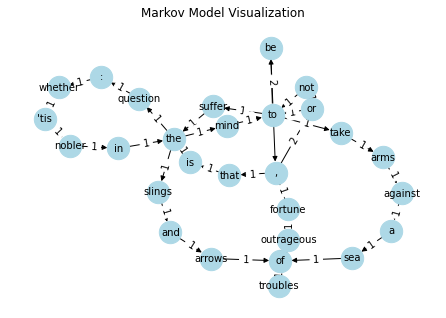

In [ ]:
to_be = "To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles"
to_be_tokens = to_be.lower().split() #convert to lowercase and break apart by spaces into a list
print(to_be_tokens)

to_be_model = MarkovModel()
to_be_model.train(to_be_tokens)
to_be_model.visualize(probabilities=False)

In [44]:
chadaayev_model = MarkovModel()

philisophical_letters_sample = "Если я удачно передал намедни свою мысль, выдолжны были убедиться, что я отнюдь не думаю, будто нам не хватает одних только знаний. Правда, и иху нас не слишком много, но приходится в данное время обойтись без тех обширных духовных сокровищ,которые веками скоплены в других странах и находятся там в распоряжении человека: нам предстоитдругое. К тому же, если и допустить, что мы смоглибы путем изучения и размышления добыть себе недостающие нам знания, откуда нам взять живые традиции, обширный опыт, глубокое осознание прошлого,прочные умственные навыки – все эти последствияогромного напряжения всех человеческих способностей, а они-то и составляют нравственную природународов Европы и дают им подлинное превосходство.Итак, задача сейчас не в расширении области нашихидей, а в том, чтобы исправить их и придать им новое направление. Что касается вас, сударыня, то вампрежде всего нужна новая сфера бытия, в которойсвежие мысли, случайно зароненные в ваш ум, и новые потребности, порожденные этими мыслями в вашей душе, нашли бы действительное приложение. Выдолжны создать себе новый мир, раз тот, в которомвы живете, стал вам чуждым.Начать с того, что состояние души нашей, как бывысоко она ни была настроена, по необходимости зависит от окружающей обстановки. Поэтому вам надлежит как следует разобраться в том, что можно сделать при вашем положении в свете и в собственнойвашей семье для согласования ваших чувств с вашимобразом жизни, ваших идей – с вашими домашнимиотношениями, ваших верований – с верованиями тех,кого вы видаете…Ведь множество зол возникает именно оттого, чтопроисходящее в глубине нашей мысли резко расходится с необходимостью подчиняться общественнымусловиям. Вы говорите, что средства не позволяютвам удобно устроиться в столице. Ну что ж, у вас прелестная усадьба: почему бы вам прочно там не обосноваться до конца ваших дней? Это счастливая необходимость, и от вас одной зависит извлечь из неевсю ту пользу, какую могли бы вам доставить самыепоучительные указания философии. Сделайте свойприют как можно более привлекательным, займитесьего красивым убранством, почему бы даже не вложить в это некоторую изысканность и нарядность?Ведь это вовсе не особый вид чувственности, заботы ваши будут иметь целью не вульгарные удовольствия, а возможность всецело сосредоточиться в сво-ей внутренней жизни. Очень прошу вас не пренебрегать этими внешними мелочами. Мы живем в стране, столь бедной проявлениями идеального, что если мы не окружим себя в домашней жизни некоторойдолей поэзии и хорошего вкуса, то легко можем утратить всякую утонченность чувства, всякое понятие обизящном. Одна из самых поразительных особенностей нашей своеобразной цивилизации заключаетсяв пренебрежении всеми удобствами и радостями жизни. Мы лишь с грехом пополам боремся с крайностями времен года, и это в стране, о которой можно нена шутку спросить себя: была ли она предназначенадля жизни разумных существ. Раз мы сделали некогданеосторожность, поселившись в этом жестоком климате, то постараемся по крайней мере ныне устроиться там так, чтобы можно было несколько забыть егосуровость.Мне помнится, вы в былое время с большим удовольствием читали Платона. Вспомните, как заботливо самый идеальный, самый выспренний из мудрецов древнего мира окружает действующих лиц своих философских драм всеми благами жизни. То онимедленно гуляют по прелестным прибрежьям Илисса или в кипарисных аллеях Гносса, то они укрываются в прохладной тени старого платана или вкушаютсладостное отдохновение на цветущей лужайке, а то,выждав спадения дневной жары, наслаждаются ароматным воздухом и тихой прохладой вечера в Аттикеили же, наконец, возлежат в удобных позах, увенчанные цветами и с кубками в руках, вокруг стола с яствами, и, только прекрасно устроив их на земле, авторвозносит их в надлунные пространства, в которых таклюбит витать7. Я мог бы вам указать и в сочиненияхсамых строгих отцов церкви, у св. Иоанна Златоуста,у св. Григория Назианзина, даже и у св. Василия, прелестные изображения уединений, где эти великие люди находили покой и высокие вдохновения, сделавшие их светилами веры. Святые мужи не думали, чтоони унижают свое достоинство, отдаваясь заботам отаких предметах, наполняющих значительную частьжизни. В этом безразличии к жизненным благам, которое иные из нас вменяют себе в заслугу, есть поистине нечто циничное. Одна из главных причин, замедляющих у нас прогресс, состоит в отсутствии всякогоотражения искусства в нашей домашней жизни.Затем я бы хотел, чтобы вы устроили себе в этомубежище, которое вы как можно лучше украсите,вполне однообразный и методический образ жизни.Нам всем не хватает духа порядка и последовательности, исправимся от этого недостатка. Не стоит повторять доводов в пользу преимуществ размеренной7 Имеются в виду участники платоновских диалогов «Федр» и «Пир».жизни, во всяком случае одно лишь постоянное подчинение определенным правилам может научить насбез усилий подчиняться высшему закону нашей природы. Но для точного поддержания известного строянеобходимо устранить все, что этому мешает. Частос первых часов дня бываешь выбит из намеченного круга занятий, и весь день испорчен. Нет ничеговажнее первых испытанных нами впечатлений, первых мыслей вслед за подобием смерти, которое разделяет один день от другого. Эти впечатления и этимысли обычно предопределяют состояние нашей души на весь день. Вот он начался домашней сваройи может кончиться непоправимой ошибкой. Поэтомуприучитесь первые часы дня сделать как можно более значительными и торжественными, сразу вознесите душу на всю ту высоту, к какой она способна,старайтесь провести эти часы в полном уединении,устраняйте все, что может слишком на вас повлиять,слишком вас рассеять, при такой подготовке вы можете безболезненно встретить те неблагоприятные впечатления, которые затем вас охватят и которые придругих условиях превратили бы ваше существованиев непрерывную борьбу, без надежды на победу. К тому же, раз это время упущено, потом уж не вернешьего для уединения и сосредоточенной мысли. Жизньпоглотит вас всеми своими заботами, как приятными,так и скучными, и вы покатитесь в нескончаемом колесе житейских мелочей. Не дадим же протекать безпользы единственному часу дня, когда мы можем принадлежать самим себе.Признаюсь, я придаю большое значение этой потребности ежедневно сосредоточиться и расправитьдушу, я уверен, что нет другого средства уберечь себяот поглощения окружающим; но вы, конечно, понимаете, что это далеко еще не все. Одна идея, пронизывающая всю вашу жизнь, должна всегда стоять передвами, служить вам светочем во всякое время дня. Мыявляемся в мир со смутным инстинктом нравственного блага, но вполне осознать его мы можем лишь вболее полной идее, которая из этого инстинкта развивается в течение всей жизни. Этой внутренней работе надо все приносить в жертву, применительно к нейнадо установить весь порядок вашей жизни. Но всеэто должно протекать в сердечном молчании, потомучто мир не сочувствует ничему глубокому. Он отвращает глаза от великих убеждений, глубокая идея егоутомляет. Вам же должны быть свойственны верноечувство и сосредоточенная мысль, не зависимые отразличных людских мнений, а уверенно ведущие васк цели. Не завидуйте обществу из-за его чувственныхудовольствий, вы обретете в своем уединении наслаждения, о которых там и понятия не имеют. Я не со-мневаюсь в том, что, освоившись с ясной атмосферойтакого существования, вы станете спокойно взиратьиз своей обители на то, как волнуется и для вас исчезает мир, вы с наслаждением будете вкушать тишину души. А там – надо усвоить себе вкусы, привычки,привязанности вашего нового образа жизни. Надо избавиться от всякого суетного любопытства, разбивающего и уродующего жизнь, и первым делом искоренить упорную склонность сердца увлекаться новинками, гоняться за злобами дня и вследствие этого постоянно с жадностью ожидать того, что случится завтра. Иначе вы не обретете ни мира, ни благополучия,а одни только разочарования и отвращение. Хотитевы, чтобы мирской поток разбивался у порога вашегомирного жилища? Если да, то изгоните из вашей душивсе эти беспокойные страсти, возбуждаемые светскими происшествиями, все эти нервные волнения, вызванные новостями дня. Замкните дверь перед всяким шумом, всякими отголосками света. Наложите усебя запрет, если хватит у вас решимости, даже ина всю легковесную литературу, по существу, она нечто иное, как тот же шум, но только в письменном виде. На мой взгляд, нет ничего вреднее для правильного умственного уклада, чем жажда чтения новинок.Повсюду мы встречаем людей, ставших неспособными серьезно размышлять, глубоко чувствовать вслед-ствие того, что пищу их составляли одни только этипроизведения последнего дня, в которых за все хватаются, ничего не углубив, в которых все обещают, ничего не выполняя, где все принимает сомнительнуюили лживую окраску и все вместе оставляет после себя пустоту и неопределенность. Если вы ищете удовлетворения в избранном вами образе жизни, необходимо добиться, чтобы новшество из-за одной новизны своей никогда вами не ценилось.Нет никакого сомнения, чем более вы согласуете свои вкусы и потребности с этим образом жизни,тем лучше вы будете себя чувствовать. Чем теснеевы свяжете внешнее с внутренним, видимое с невидимым, тем более вы облегчите предстоящий путь.Не надо, однако, скрывать от себя и ожидающих ваструдностей. Их у нас так много, что всех и не перечесть. Здесь не торная дорога, где колесо жизни катится по наезженной колее: это тропа, по которой приходится продираться сквозь тернии и колючки, а подчас и сквозь чащу. В старых цивилизованных странахЕвропы давно сложились определенные бытовые образцы, так что там, когда решишь переменить обстановку, приходится просто-напросто выбрать ту новуюрамку, в которую желаешь перенестись, – место заранее готово. Распределение ролей сделано. Как тольковы изберете подходящий род жизни, и люди и предме-ты сами собой расположатся вокруг вас. Вам остается только должным образом их использовать. Совсеминое дело у нас. Сколько издержек, сколько труда,прежде чем вы освоитесь в новой обстановке. Сколько теряется времени, сколько затрачивается сил наприспособление, на то, чтобы приучить окружающихсмотреть на вас сообразно с новым вашим положением, чтобы заставить молчать глупца, чтобы улеглосьлюбопытство. Разве здесь знают, что такое могущество мысли? Разве здесь испытали, как прочно убеждение вследствие тех или других причин вторгаетсяв душу вопреки привычному ходу вещей, через некоевнезапное озарение, через указание свыше, овладевает душой, опрокидывает целиком ваше существование и поднимает вас выше вас самих и всего, чтовас окружает? Живое вызывало ли здесь когда-либосердечный отклик?Естественно, что всякий, кто отдался бы с жаромсвоим верованиям, наткнется среди этой толпы, которую никогда ничего не потрясало, на препятствияи возражения. Вам придется себе все создавать, сударыня, вплоть до воздуха для дыхания, вплоть допочвы под ногами. И это буквально так. Эти рабы, которые вам прислуживают, разве не они составляютокружающий вас воздух? Эти борозды, которые в потелица взрыли другие рабы, разве это не та почва, кото-рая вас носит? И сколько различных сторон, сколькоужасов заключает в себе одно слово: раб! Вот заколдованный круг, в нем все мы гибнем, бессильные выйти из него. Вот проклятая действительность, о нее мывсе разбиваемся. Вот что превращает у нас в ничтосамые благородные усилия, самые великодушные порывы. Вот что парализует волю всех нас, вот что пятнает все наши добродетели. Отягченная роковым грехом, где она, та прекрасная душа, которая бы не заглохла под этим невыносимым бременем? Где человек, столь сильный, чтобы в вечном противоречии ссамим собою, постоянно думая одно и поступая подругому, он не опротивел сам себе? И вот я снова вернулся, сам того не замечая, к тому, с чего начал: позвольте мне еще немного на этом остановиться, и я затем вернусь к вам.Эта ужасная язва, которая нас изводит, в чем же еепричина? Как могло случиться, что самая поразительная черта христианского общества как раз именно иесть та, от которой русский народ отрекся на лоне самого христианства? Откуда у нас это действие религии наоборот? Не знаю, но мне кажется, одно это могло бы заставить усомниться в православии, которыммы кичимся. Вы знаете, что ни один философ древности не пытался представить себе общества без рабов,да и не находил никаких возражений против рабства.Аристотель, признанный представитель всей той мудрости, какая только была в мире до пришествия Христа, утверждал, что люди родятся – одни, чтобы бытьсвободными, другие – чтобы носить оковы8. Вы знаете также и то, что, по признанию самых даже упорных скептиков, уничтожением крепостничества в Европе мы обязаны христианству. Более того, известно,что первые случаи освобождения были религиознымиактами и совершались перед алтарем и что в большинстве отпускных грамот мы встречаем выражение:pro redemptione animae – ради искупления души. Наконец, известно, что духовенство показало везде пример, освобождая собственных крепостных, и что римские первосвященники первые вызвали уничтожениерабства в области, подчиненной их духовному управлению. Почему же христианство не имело таких жепоследствий у нас? Почему, наоборот, русский народподвергся рабству лишь после того, как он стал христианским, а именно в царствование Годунова и Шуйского? Пусть православная церковь объяснит это явление.Пусть скажет, почему она не возвысила материнского голоса против этого отвратительного насилияодной части народа над другой. И посмотрите, пожалуйста, как мало нас знают, невзирая на всю нашу8 Аристотель. Политика, кн. , гл. 2.внешнюю мощь. Как раз на этих днях в одно время ина Босфоре и на Евфрате прогремел гром наших пушек9. А между тем историческая наука, которая именно в это самое время доказывает, что уничтожениерабства есть заслуга христианства, даже и не подозревает, что христианский народ в 0 миллионов душпребывает в оковах. Дело в том, что значение народов в человечестве определяется лишь их духовноймощью и что то внимание, которое они к себе возбуждают, зависит от их нравственного влияния в мире, ане от шума, который они производят. Теперь вернемся назад.После сказанного о желательном, на мой взгляд,для вас образе жизни вы, пожалуй, могли бы подумать, что я требую от вас монашеской замкнутости.Но речь идет лишь о трезвом и осмысленном существовании, а оно не имеет ничего общего с мрачнойсуровостью аскетической морали. Я говорю о жизни,отличной от жизни толпы, с такой положительной идеей и таким чувством, преисполненным убеждения, ккоторому сводились бы все остальные мысли, всеостальные чувства. Такое существование прекрасномирится со всеми законными благами жизни: оно даже их требует, и общение с людьми – необходимое9 Русские войска блокировали Босфор в мае 829 г. и взяли Эрзерумв апреле 829 г.его условие. Одиночество таит свои опасности, в немподчас нас ожидают еще большие искушения. Сосредоточенный в самом себе ум питается созданными имлживыми образами и подобно св. Антонию населяетсвою пустыню призраками, порождениями собственного воображения, и они его затем и преследуют20. Амежду тем, если развивать религиозную мысль безстрасти, без насилия, то сохранишь даже и среди мирской суеты то внутреннее состояние, в котором всеобольщения, все увлечения жизни теряют силу.Надо найти такое душевное настроение, мягкое ипростое, которое сумело бы без усилий сочетать совсеми действиями разума, со всеми возбуждениямисердца идею истины и добра. В особенности следует стремиться проникнуться истинами откровения.Огромное преимущество этих истин в том, что они доступны всякому разумному существу, что они мирятсяс особенностями всех умов. К ним ведут всевозможные пути: и покорная и слепая вера, которую без размышления исповедуют массы, и глубокое знание, ипростодушное сердечное благоговение, и вдохновенное размышление, и возвышенная поэзия души. Однако самый простой путь – целиком положиться на тестоль частые случаи, когда мы сильнее всего подпа20 Имеются в виду предания об искушении св. Антония, одного из основателей христианского монашества, дьявольской силой.даем действию религиозного чувства на нашу душу инам кажется, что мы лишились лично нам принадлежащей силы и против своей воли влечемся к добрукакою-то высшей силой, отрывающей нас от земли ивозносящей на небо. И вот тогда именно, в сознаниисвоей немощи, дух наш раскроется с необычайной силой для мыслей о небе, и самые высокие истины сами собой потекут в наше сердце.Многократно возвращаясь к основному началу нашей духовной деятельности, к тому, что вызывает наши мысли и наши поступки, невозможно не заметить,что значительная часть их определяется чем-то таким, что нам отнюдь не принадлежит, и что самое хорошее, самое возвышенное, самое для нас полезноеиз происходящего в нас вовсе не нами производится. Все то благо, которое мы совершаем, есть прямое следствие присущей нам способности подчиняться неведомой силе:(а) единственная действительная основа деятельности, исходящей от нас самих, связана с представлением о нашей выгоде, в пределах того отрезка времени, который мы зовем жизнью; это не что иное, какинстинкт самосохранения, который общ нам со всеми одушевленными существами, но видоизменяетсяв нас согласно нашей своеобразной природе. Поэтому, что́ бы мы ни делали, какую бы незаинтересован-ность ни стремились вложить в свои чувства и своипоступки, руководит нами всегда одна только эта выгода, более или менее правильно понятая, более илименее близкая или отдаленная."

#philisophical_letters_sample = "is it the cyrilic that's breaking this? What's wrong python?"
philisophical_letters_sample = philisophical_letters_sample.lower()
philisophical_letters_list = list(philisophical_letters_sample.split(" "))
chadaayev_model.train(philisophical_letters_list)


#print(philisophical_letters_list)
#print(str(chaadayev_model) )
#print( model ) #uncomment to print the whole model

chadaayev_model.generate_text(50,"если")

'если я отнюдь не стоит повторять доводов в нем все мы лишились лично нам принадлежащей силы и сколько теряется времени, который мы встречаем выражение:pro redemptione animae – чтобы заставить усомниться в былое время ина всю вашу жизнь, и допустить, что я не вернешьего для дыхания, вплоть до конца ваших верований – '

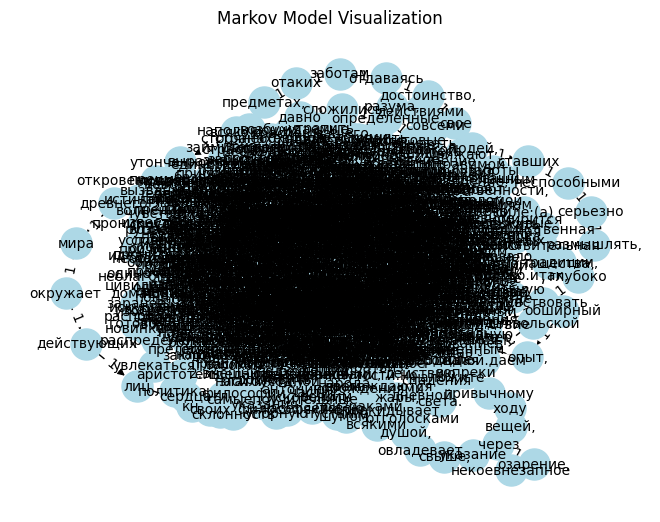

In [46]:
model.visualize(probabilities=False)

In [13]:
mort = "This is the bright candlelit room where the life-timers are stored—shelf upon shelf of them, squat hourglasses, one for every living person, pouring their fine sand from the future into the past. The accumulated hiss of the falling grains makes the room roar like the sea. This is the owner of the room, stalking through it with a preoccupied air. His name is Death. But not any Death. This is the Death whose particular sphere of operations is, well, not a sphere at all, but the Discworld, which is flat and rides on the back of four giant elephants who stand on the shell of the enormous star turtle Great A’Tuin, and which is bounded by a waterfall that cascades endlessly into space. Scientists have calculated that the chance of anything so patently absurd actually existing are millions to one. But magicians have calculated that million-to-one chances crop up nine times out of ten. Death clicks across the black and white tiled floor on toes of bone, muttering inside his cowl as his skeletal fingers count along the rows of busy hourglasses. Finally he finds one that seems to satisfy him, lifts it carefully from its shelf and carries it across to the nearest candle. He holds it so that the light glints off it, and stares at the little point of reflected brilliance. The steady gaze from those twinkling eye sockets encompasses the world turtle, sculling through the deeps of space, carapace scarred by comets and pitted by meteors. One day even Great A’Tuin will die, Death knows; now, that would be a challenge. But the focus of his gaze dives onwards towards the blue-green magnificence of the Disc itself, turning slowly under its tiny orbiting sun. Now it curves away towards the great mountain range called the Ramtops. The Ramtops are full of deep valleys and unexpected crags and considerably more geography than they know what to do with. They have their own peculiar weather, full of shrapnel rain and whiplash winds and permanent thunderstorms. Some people say it’s all because the Ramtops are the home of old, wild magic. Mind you, some people will say anything. Death blinks, adjusts for depth of vision. Now he sees the grassy country on the turnwise slopes of the mountains. Now he sees a particular hillside. Now he sees a field. Now he sees a boy, running. Now he watches. Now, in a voice like lead slabs being dropped on granite, he says: YES. There was no doubt that there was something magical in the soil of that hilly, broken area which—because of the strange tint that it gave to the local flora—was known as the octarine grass country. For example, it was one of the few places on the Disc where plants produced reannual varieties. Reannuals are plants that grow backwards in time. You sow the seed this year and they grow last year. Mort’s family specialized in distilling the wine from reannual grapes. These were very powerful and much sought after by fortune-tellers, since of course they enabled them to see the future. The only snag was that you got the hangover the morning before, and had to drink a lot to get over it. Reannual growers tended to be big, serious men, much given to introspection and close examination of the calendar. A farmer who neglects to sow ordinary seeds only loses the crop, whereas anyone who forgets to sow seeds of a crop that has already been harvested twelve months before risks disturbing the entire fabric of causality, not to mention acute embarrassment. It was also acutely embarrassing to Mort’s family that the youngest son was not at all serious and had about the same talent for horticulture that you would find in a dead starfish. It wasn’t that he was unhelpful, but he had the kind of vague, cheerful helpfulness that serious men soon learn to dread. There was something infectious, possibly even fatal, about it. He was tall, red-haired and freckled, with the sort of body that seems to be only marginally under its owner’s control; it appeared to have been built out of knees. On this particular day it was hurtling across the high fields, waving its hands and yelling. Mort’s father and uncle watched it disconsolately from the stone wall.  What I don’t understand,  said father Lezek,  is that the birds don’t even fly away. I’d fly away, if I saw it coming towards me.   Ah. The human body’s a wonderful thing. I mean, his legs go all over the place but there’s a fair turn of speed there.  Mort reached the end of a furrow. An overfull woodpigeon lurched slowly out of his way.  His heart’s in the right place, mind,  said Lezek, carefully.  Ah. ’Course, ’tis the rest of him that isn’t.   He’s clean about the house. Doesn’t eat much,  said Lezek.  No, I can see that.  Lezek looked sideways at his brother, who was staring fixedly at the sky.  I did hear you’d got a place going up at your farm, Hamesh,  he said.  Ah. Got an apprentice in, didn’t I?   Ah,  said Lezek gloomily,  when was that, then?   Yesterday,  said his brother, lying with rattlesnake speed.  All signed and sealed. Sorry. Look, I got nothing against young Mort, see, he’s as nice a boy as you could wish to meet, it’s just that—   I know, I know,  said Lezek.  He couldn’t find his arse with both hands.  They stared at the distant figure. It had fallen over. Some pigeons had waddled over to inspect it.  He’s not stupid, mind,  said Hamesh.  Not what you’d call stupid.   There’s a brain there all right,  Lezek conceded.  Sometimes he starts thinking so hard you has to hit him round the head to get his attention. His granny taught him to read, see. I reckon it overheated his mind.  Mort had got up and tripped over his robe.  You ought to set him to a trade,  said Hamesh, reflectively.  The priesthood, maybe. Or wizardry. They do a lot of reading, wizards.  They looked at each other. Into both their minds stole an inkling of what Mort might be capable of if he got his well-meaning hands on a book of magic.  All right,  said Hamesh hurriedly.  Something else, then. There must be lots of things he could turn his hand to.   He starts thinking too much, that’s the trouble,  said Lezek.  Look at him now. You don’t think about how to scare birds, you just does it. A normal boy, I mean.  Hamesh scratched his chin thoughtfully.  It could be someone else’s problem,  he said. Lezek’s expression did not alter, but there was a subtle change around his eyes.  How do you mean?  he said.  There’s the hiring fair at Sheepridge next week. You set him as a prentice, see, and his new master’ll have the job of knocking him into shape. ’Tis the law. Get him indentured, and ’tis binding.  Lezek looked across the field at his son, who was examining a rock."
pratchett_model = MarkovModel()

mort = mort.lower()
mort_list = list(mort.split(" "))
pratchett_model.train(mort_list)


#print(philisophical_letters_list)
#print(str(chaadayev_model) )
#print( model ) #uncomment to print the whole model

pratchett_model.generate_text(50,"i")

'i don’t think about the bright candlelit room roar like lead slabs being dropped on granite, he starts thinking so hard you just that—  mort had waddled over the priesthood, maybe. or wizardry. they enabled them to introspection and pitted by a voice like lead slabs being dropped on toes '